<a href="https://colab.research.google.com/github/BifoldTide/-Core-Proyecto-2-Parte-I-/blob/develop/(Core)_Proyecto_2_%E2%80%93_Parte_I_EDA_1_(Tips)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Descripción del dataset:
Importado desde la biblioteca Seaborn
tamaño: 244 columnas
datos:
- Cuenta total
- Propina
- Sexo
- Fumador (Si/No)
- Día
- Comida del día
- Cantidad de comensales en la mesa

### Carga de datos

In [2]:
# Cargar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar los datos y descargarlos para comparaciones (Si las llega a haber)
import seaborn as sns;
df = sns.load_dataset('tips')
df.to_csv("Tips.csv")

# Ver que se hayan cargado correctamente
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Revisión de dataset

In [4]:
# Datos generales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
# Columnas caregóricas
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["day"].unique())
print(df["time"].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['No', 'Yes']
Categories (2, object): ['Yes', 'No']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']


In [6]:
# Estadísticas de columnas numéricas
df.describe() #Total bill tiene una variación algo alta

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [7]:
# Revisión de cuenta total
df[df["total_bill"] > 40] # Algunas de las cuentas más altas tienen relación con una propina más alta

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [8]:
# DF condicionado para mapa de calor
df_heatmap = df.copy()
df_heatmap["is_male"] = df["sex"].apply(lambda x: 0 if x == "Female" else 1)
df_heatmap["is_female"] = df["sex"].apply(lambda x: 0 if x == "Male" else 1)
df_heatmap = df_heatmap.drop(columns = "sex")
df_heatmap["is_smoker"] = df["smoker"].apply(lambda x: 0 if x == "No" else 1)

# Diccionario de días
dias = {"Mon" : 0, "Tue" : 1, "Wed" : 2, "Thur" : 3, "Fri" : 4, "Sat" : 5, "Sun" : 6}

df_heatmap["day"] = df_heatmap["day"].map(dias)
df_heatmap["is_lunch"] = df["time"].apply(lambda x: 1 if x == "Lunch" else 0)
df_heatmap["is_dinner"] = df["time"].apply(lambda x: 1 if x == "Dinner" else 0)
df_heatmap = df_heatmap.drop(columns = "time")
df_heatmap = df_heatmap.drop(columns = "smoker")

# Conversión de columnas
df_heatmap["day"] = df_heatmap["day"].astype(np.int64)
df_heatmap["is_male"] = df_heatmap["is_male"].astype(np.int64)
df_heatmap["is_female"] = df_heatmap["is_female"].astype(np.int64)
df_heatmap["is_smoker"] = df_heatmap["is_smoker"].astype(np.int64)
df_heatmap["is_lunch"] = df_heatmap["is_lunch"].astype(np.int64)
df_heatmap["is_dinner"] = df_heatmap["is_dinner"].astype(np.int64)
df_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   day         244 non-null    int64  
 3   size        244 non-null    int64  
 4   is_male     244 non-null    int64  
 5   is_female   244 non-null    int64  
 6   is_smoker   244 non-null    int64  
 7   is_lunch    244 non-null    int64  
 8   is_dinner   244 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 17.3 KB


### Demostración de data

            total_bill       tip       day      size   is_male  is_female  \
total_bill    1.000000  0.678968  0.195085  0.604791  0.147717  -0.147717   
tip           0.678968  1.000000  0.178553  0.468268  0.055982  -0.055982   
day           0.195085  0.178553  1.000000  0.235459  0.227545  -0.227545   
size          0.604791  0.468268  0.235459  1.000000  0.096021  -0.096021   
is_male       0.147717  0.055982  0.227545  0.096021  1.000000  -1.000000   
is_female    -0.147717 -0.055982 -0.227545 -0.096021 -1.000000   1.000000   
is_smoker     0.061101  0.016984 -0.075894 -0.129651  0.002816  -0.002816   
is_lunch     -0.208096 -0.140286 -0.804326 -0.164948 -0.205231   0.205231   
is_dinner     0.208096  0.140286  0.804326  0.164948  0.205231  -0.205231   

            is_smoker  is_lunch  is_dinner  
total_bill   0.061101 -0.208096   0.208096  
tip          0.016984 -0.140286   0.140286  
day         -0.075894 -0.804326   0.804326  
size        -0.129651 -0.164948   0.164948  
is_m

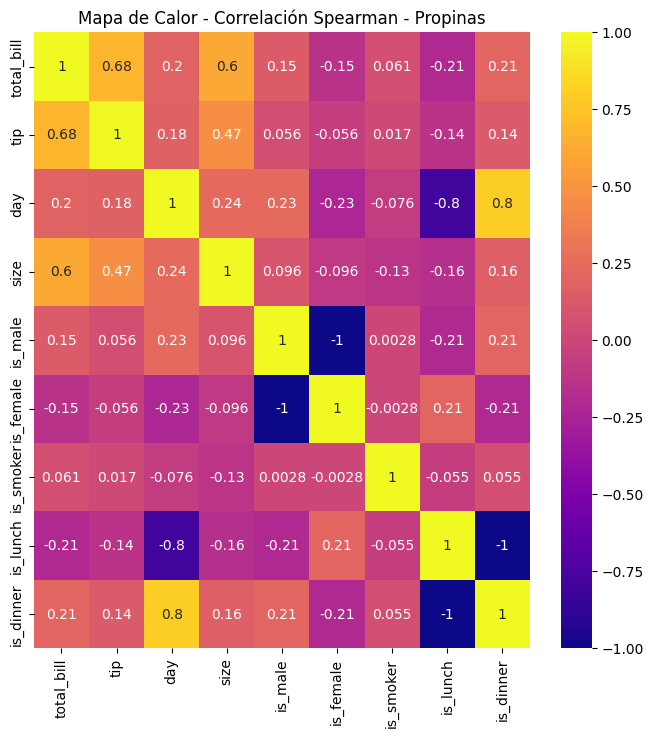

In [9]:
# Mapa de calor
# Generación correlativo con Spearman (es el que prefiero)
corr_spearman = df_heatmap.corr(method='spearman')
print(corr_spearman)
from os import name
# Generación mapa con correlativo
fig = plt.figure(figsize=(8, 8))
sns.heatmap(corr_spearman, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor - Correlación Spearman - Propinas")
plt.show()

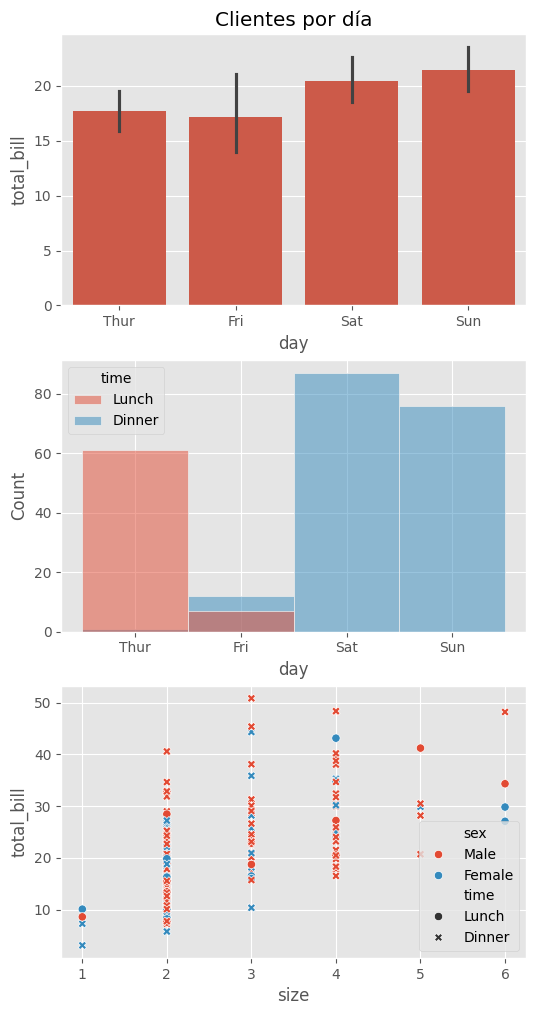

In [36]:
# Gráficos
fig = plt.figure(figsize = (6, 12))
plt.style.use('ggplot')
plt.subplot(3, 1, 1)

# Grafico de barras de n° de clientes por día
sns.barplot(data = df, x = "day", y = "total_bill")
plt.title("Ganancias por día")

plt.subplot(3, 1, 2)
# Histograma de clientes por comida y día
sns.histplot(data = df, x = "day", hue = "time")
plt.title("Clientes por díay hora")

plt.subplot(3, 1, 3)
# Grafico de dispersión de total a pagar por cantidad de comensales
sns.scatterplot(data = df, x = "size", y = "total_bill", hue = "sex", style = "time")
plt.title("Clientes por cantidad, género, hora y total a pagar")
plt.show()

### Resumen
 - Son más las personas que vienen a comer en parejas o en grupos (especialmente de 4 personas) que gente sola.
 - Es más probable que la persona que pague sea mujer
 - Los comensales más frecuentes son los que vienen a cenar
 - El día en el que más se ganó dinero es domingo, mientras que el que menos dió es el viernes
 - El día en el que hubo más clientes fue el sábado para cenar, y el que menos tuvo fue el viernes, dividiendo la frecuencia de clientes casi equitativamente para el almuerzo y la cena